# Carga de datos y librerias

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El DataFrame `titanic` contiene la siguiente información sobre los pasajeros del Titanic:

*   **PassengerId**: Un número de identificación único para cada pasajero.
*   **Survived**: Indica si el pasajero sobrevivió (1) o no (0).
*   **Pclass**: La clase del billete del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera).
*   **Name**: El nombre del pasajero.
*   **Sex**: El sexo del pasajero (male/female).
*   **Age**: La edad del pasajero en años. Contiene valores faltantes.
*   **SibSp**: Número de hermanos/cónyuges a bordo.
*   **Parch**: Número de padres/hijos a bordo.
*   **Ticket**: El número del billete.
*   **Fare**: La tarifa pagada por el billete.
*   **Cabin**: El número de cabina del pasajero.
*   **Embarked**: El puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

# Actividad. Explorando el Titanic

El RMS Titanic es uno de los accidentes más famosos en la historia humana. En su época era considerado como el barco más grande y lujoso del mundo, e incluso anunciado como insumergible. Sin embargo, la noche del 14 de abril del 1912 el Titanic colisionó inevitablemente con un iceberg llevando a abordo más de 2.200 ocupantes.

El análisis de los datos de este accidente es fundamental para comprender las dinámicas de supervivencia y las decisiones tomadas durante la emergencia. Estudiar esta información nos permite inferir los criterios (sociales, demográficos o logísticos) que determinaron quiénes tuvieron prioridad para acceder a los botes salvavidas.

A través de este estudio, se espera identificar qué características específicas de los pasajeros y la tripulación tuvieron mayor peso en la probabilidad de supervivencia, revelando si existieron sesgos por clase, género o edad en el protocolo de rescate.

## Parte 1: Variación

Variables escogidas:


1.   ¿Cómo se distribuye las edades en los pasajeros? ¿Qué rango fue el más representativo?(Edad)
2.   ¿Cuál es la distribución de las 3 clases presentes en el Titanic? (PClass)
3.   ¿Cuál es la proporción de hombres y mujeres abordo del Titanic? (Sexo)
4.   ¿Cuál es la proporción de tripulantes que sobrevivió el accidente? (Survived)



### Edad:


<Axes: ylabel='Age'>

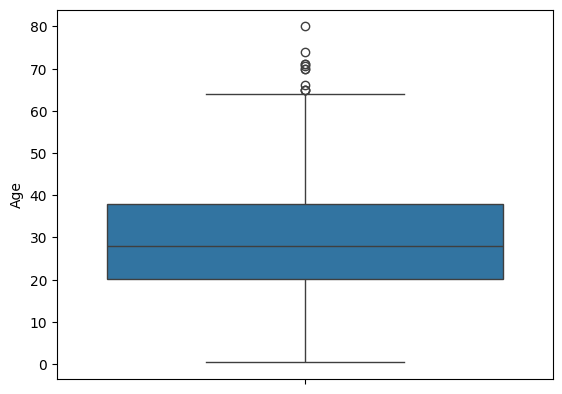

In [187]:
sns.boxplot(data=titanic, y='Age')

In [188]:
min_age = titanic['Age'].min()
max_age = titanic['Age'].max()

print(f"La edad mínima de los pasajeros es: {min_age:.0f} años")
print(f"La edad máxima de los pasajeros es: {max_age:.0f} años")

La edad mínima de los pasajeros es: 0 años
La edad máxima de los pasajeros es: 80 años


De la gráfica, podemos observar la distribución de las edades del Titanic. En el bloxplot, observamos que la gran mayoría de los tripulantes presentan una edad entre los 20 y 38 años. Además, sabemos que la edad varía entre el rango de 0 a 80 años. Por otra parte, el boxplot muestra que edades alrededor de más de 65 años representan valores atípicos, al mostrarse más allá del 1.5 del rango intercuartilico.

#### Hipótesis
Gracias a la gran densidad de adultos jóvenes con niños, se puede realizar la hipótesis que el viaje del Titanic tenía un componente migratorio.

### PClass

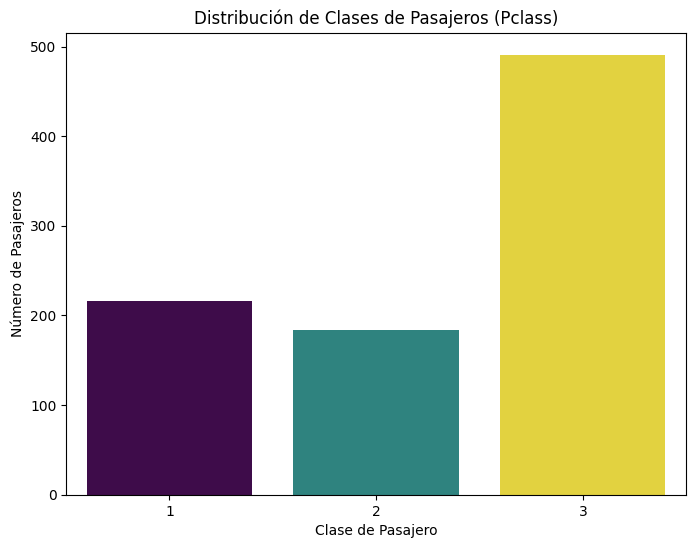

In [189]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title('Distribución de Clases de Pasajeros (Pclass)')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Pasajeros')
plt.show()

La gráfica de barras ayuda a comprender la distribución de clases de la tripulación. La proporción es mayor para la clase 3, con una cantidad cercana a los 500 pasajeros; siguiendo con la clase 1 con alrededor de 200, y por último la clase 2 con menos de 200 personas.

#### Hipótesis
La proporción de las clases nos ayuda a formular la hipótesis que el viaje realizado por el Titanic no era meramente de turismo o vacacional, si no que representaba un viaje laboral o de temas migratorios.

### Sexo

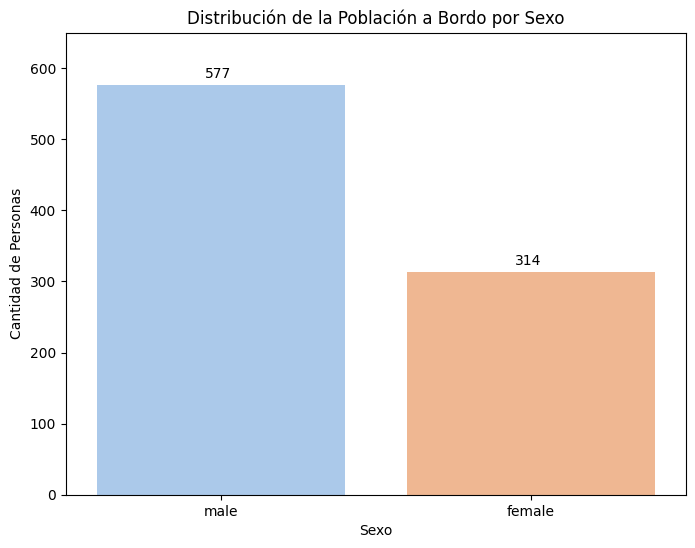

In [190]:
plt.figure(figsize=(8, 6))
# countplot cuenta automáticamente las frecuencias
ax = sns.countplot(data=titanic, x='Sex', hue='Sex', palette='pastel', order=['male', 'female'], legend=False)

# Añadir el número exacto sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + 0.35, p.get_height() + 10))

plt.title('Distribución de la Población a Bordo por Sexo')
plt.ylabel('Cantidad de Personas')
plt.xlabel('Sexo')
plt.ylim(0, 650) # Dar espacio arriba para el número
plt.show()

Podemos observar en la gráfica de pastel que la proporción dentro del titanic es mayor para los hombres, con una cantidad de 577 abordo. Por otra parte, podemos ver que las mujeres presentan solo 314 abordo.


#### Hipótesis
Podemos considerar que la proporción mayor de hombres se debe a la gran presencia de hombres dentro de las tripulaciones en la época. Por esto, la gráfica se ve desporporcionada, debido a que se incluyen a los trabajadores del barco.

### Sobrevivientes

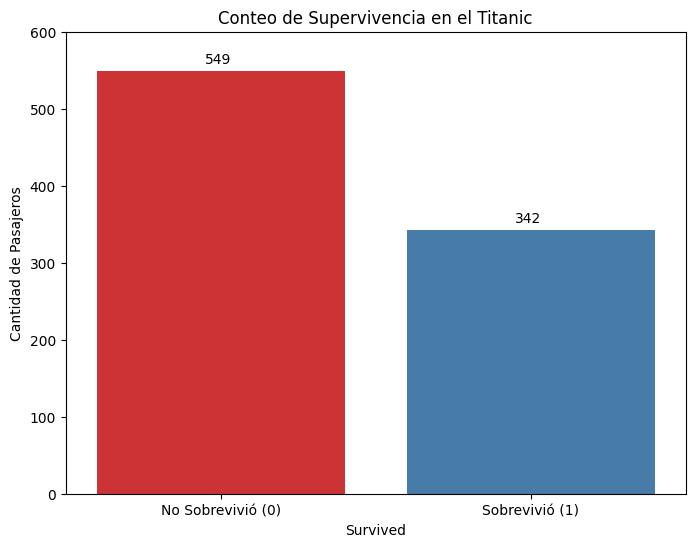

In [191]:
plt.figure(figsize=(8, 6))

# Palette 'Set1' usa  Rojo y Azul
ax = sns.countplot(x='Survived', data=titanic, hue='Survived', palette='Set1', legend=False)

# Etiquetas para mejor comprensión (0 -> No, 1 -> Si)
plt.xticks([0, 1], ['No Sobrevivió (0)', 'Sobrevivió (1)'])
plt.ylabel('Cantidad de Pasajeros')
plt.title('Conteo de Supervivencia en el Titanic')

# Numeración de los casos
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + 0.35, p.get_height() + 10))

plt.ylim(0, 600) # Espacio extra arriba
plt.show()

Como se observa en la gráfica de barras, la cantidad de sobrevivientes es menor a los que no sobrevivieron. Existe una diferencia de proporció importante que nos puede ayudar a formular preguntas sobre lo sucedido en los procesos del viaje. Observamos que murieron 549 personas y que solo 342 lograron sobrevivir al accidente.

#### Hipótesis
La capacidad de botes salvavidas no eran suficientes para la tripulación que tenía abordo el Titanic. La alta mortalidad del suceso nos puede llegar a sugerir un error sistemático sobre la disponibilidad de recursos.

## Parte 2. Covariación

*   ¿La edad varia de igual forma en las distintas clases sociales?


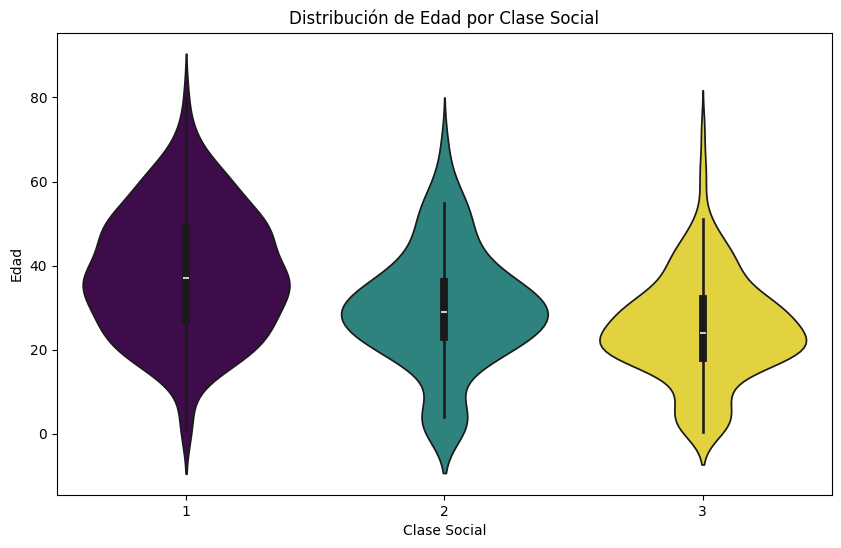

In [192]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Pclass', palette='viridis', legend=False)
plt.title('Distribución de Edad por Clase Social')
plt.xlabel('Clase Social')
plt.ylabel('Edad')
plt.show()

Podemos observar que la distribución de edades varía mediante la clase social en la que nos encontramos. En la clase 1 podemos encontrar una gran densidad de personas alrededor de los 40 años, mientras que las clases 2 y 3 presentan gran densidad en edades alrededor de los 30 años.

Además, podemos observar que en las clases 2 y 3 se presenta mayor cantidad de niños menores a 10 años.

*   ¿La tasa de sobrevivientes puede ser determinada por las diferentes clases sociales?



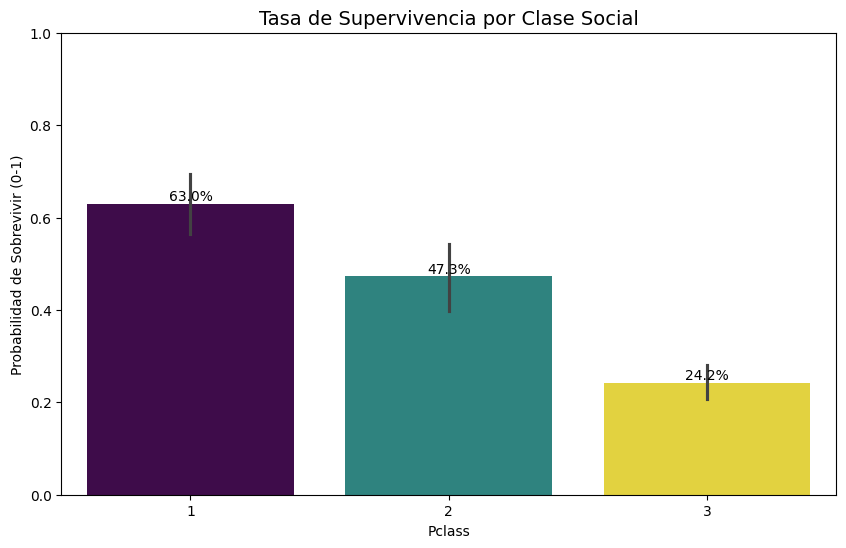

In [193]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Pclass', palette='viridis', legend=False)
plt.title('Tasa de Supervivencia por Clase Social', fontsize=14)
plt.ylabel('Probabilidad de Sobrevivir (0-1)')
plt.ylim(0, 1)

# Añadir porcentajes en las barras
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Como podemos observar en el barplot, la proporción de los sobrevivientes se ve afectada de distinta manera dependiendo de la clase del tripulante. Se observa una mayor proporción de sobrevivientes en la clase 1, mientras que va disminuyendo esta propoción cuando nos movemos a la clase 3.

Esto nos cuenta que se priorizaron a las personas de clase 1, y por ende más personas lograron tener acceso a los botes salvavidas.

*   ¿Que edades se priorizaron en la distribución de los botes salvavidas a pesar de la clase social?


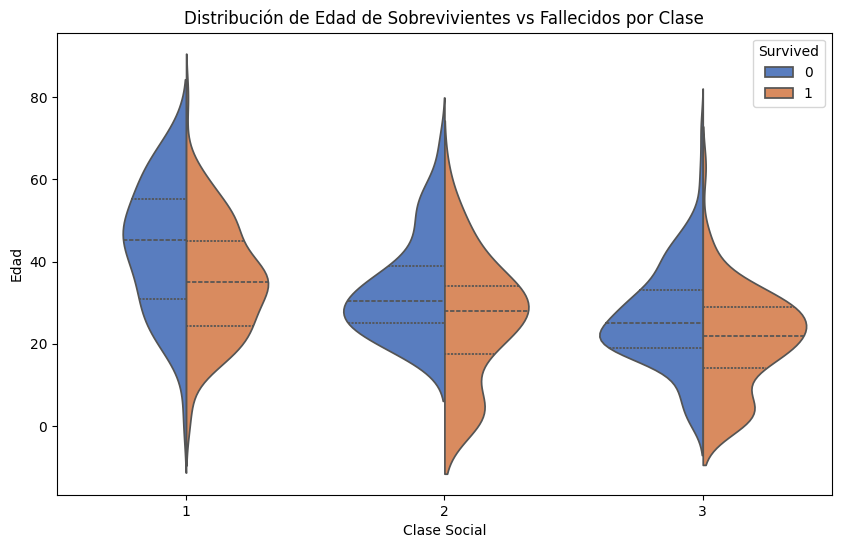

In [194]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de violín para conocer la distribución de edades respecto a la clase social
sns.violinplot(data=titanic, x="Pclass", y="Age", hue="Survived",
               split=True, inner="quart", palette="muted")

plt.title('Distribución de Edad de Sobrevivientes vs Fallecidos por Clase')
plt.xlabel('Clase Social')
plt.ylabel('Edad')
plt.show()

En el Violin Plot, podemos ver que en edades tempranas (menores de 10 años) la cantidad de no sobrevivientes de mantiene baja, mientras que la cantidad de sobrevivientes crece. A medida que avanzamos la edad, podemos notar diferencias significativas en los sobrevivientes.

Con esto, podemor decir que apesar de la diferencia de clases sociales, se priorizaron a los niños.

* ¿El sexo fue un determinante para definir a los sobrevivientes?


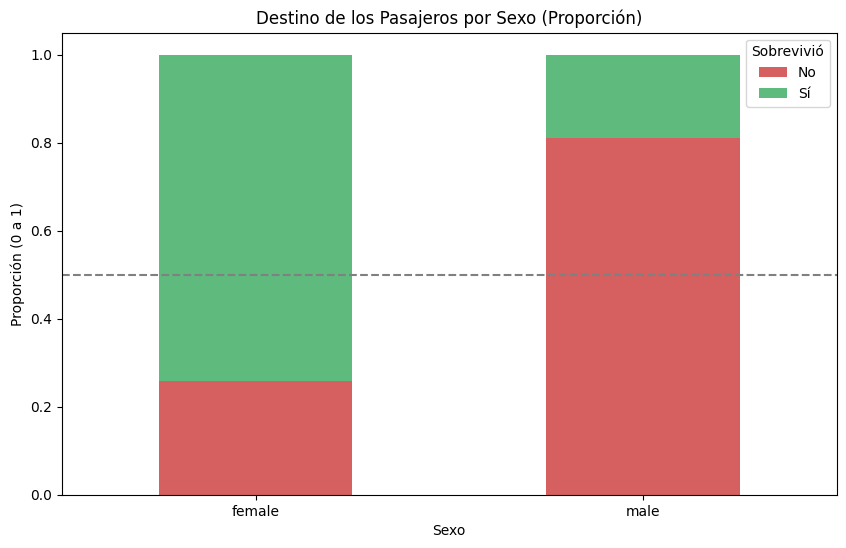

In [195]:
crosstab = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')

crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#d65f5f', '#5fba7d'])
plt.title('Destino de los Pasajeros por Sexo (Proporción)')
plt.ylabel('Proporción (0 a 1)')
plt.xlabel('Sexo')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'], loc='upper right')
plt.xticks(rotation=0) # Poner las etiquetas horizontales

# Línea de referencia del 50%
plt.axhline(0.5, color='gray', linestyle='--')

plt.show()

Podemos observar que más de la mitad de las mujeres abordo del Titanic sobrevivieron; y en contraparte los hombres presentaron más de la mitad como no sobrevivieron al accidente.

Podemos considerar que las mujeres fueron prioridad para poder tomar los botes salvavidas.

* ¿Se consideraron a los menores de edad apesar del sexo para subir a los botes salvavidas?


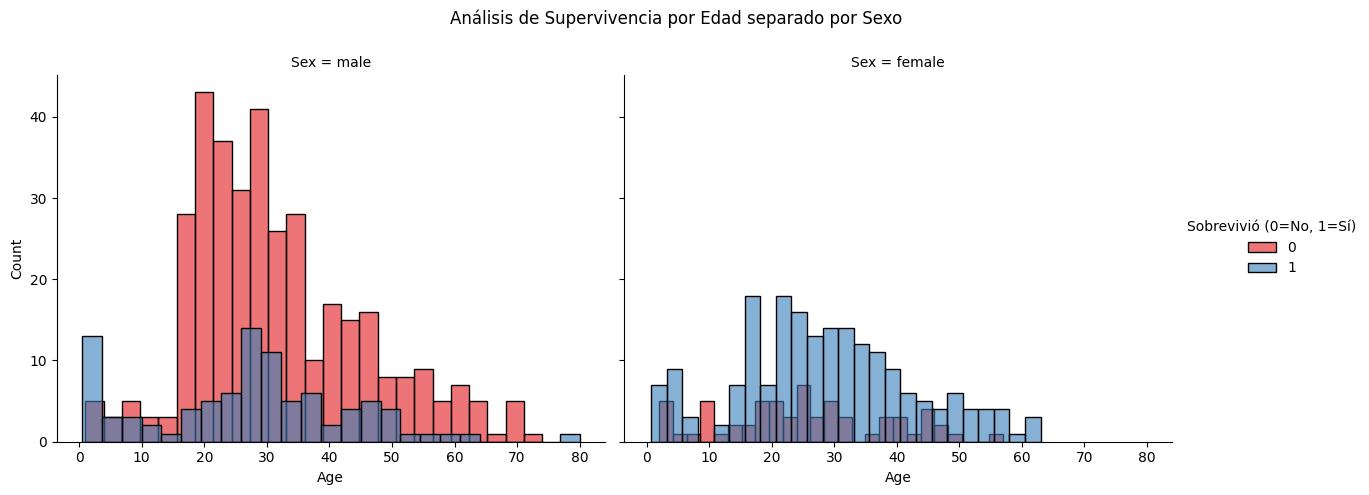

In [196]:
# Crear la rejilla: Columnas separadas por 'Sex', coloreadas por 'Survived'
g = sns.FacetGrid(titanic, col="Sex", hue="Survived", height=5, aspect=1.2, palette="Set1")

# En cada gráfico, dibujar un histograma de la edad
g.map(sns.histplot, "Age", bins=25, alpha=0.6)

g.add_legend(title="Sobrevivió (0=No, 1=Sí)")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Análisis de Supervivencia por Edad separado por Sexo')

plt.show()

Como se observan en los histogramas, la mayoría de las mujeres fueron sobrevivientes, apesar de la edad que tuvieran.

Por el lado de los hombres, solo en los casos de menores de 10 años fueron en su mayoría sobrevivientes; mientras que los hombres mayores de 10 años no tuvieron la misma suerte.

Con esto podemos conocer un poco más sobre los criterios utilizados para definir a las personas que tomaran los botes salvavidas y pudieran sobrevivir.

## Parte 3:  Valores Faltantes

In [197]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

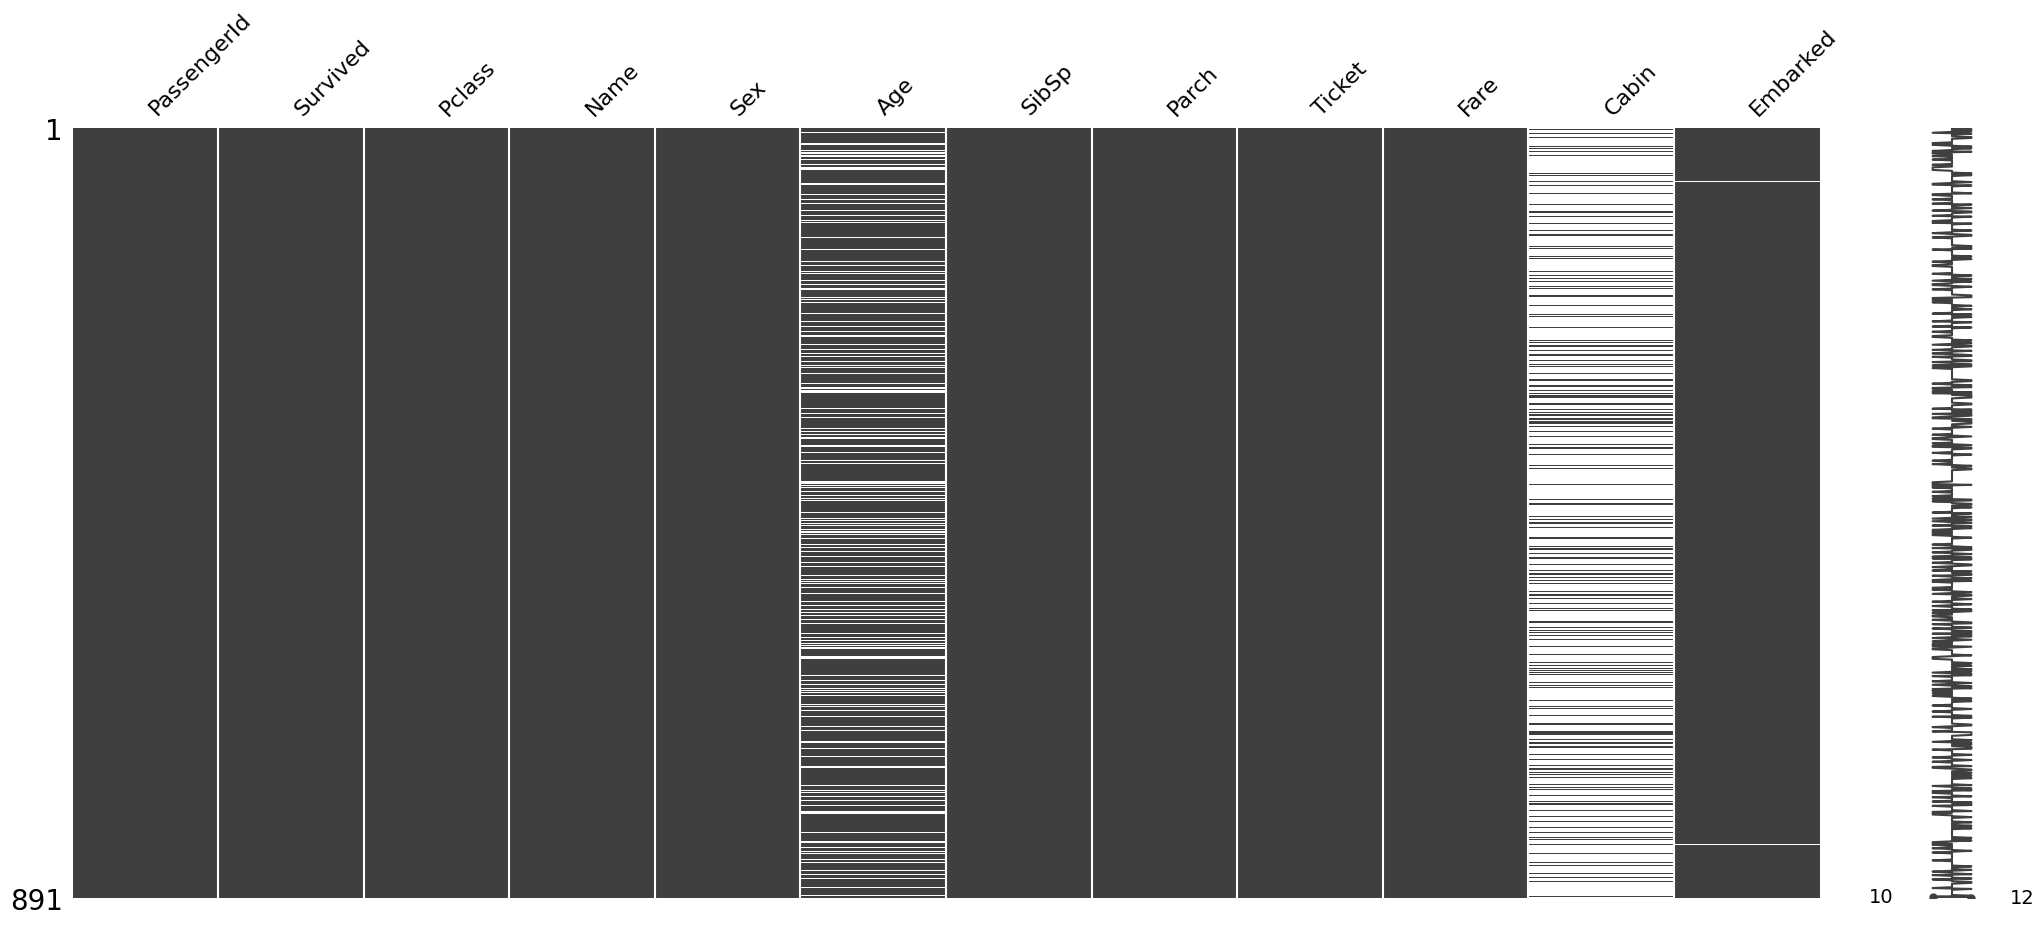

In [198]:
import missingno as msno  # pip install missingno
msno.matrix(titanic)

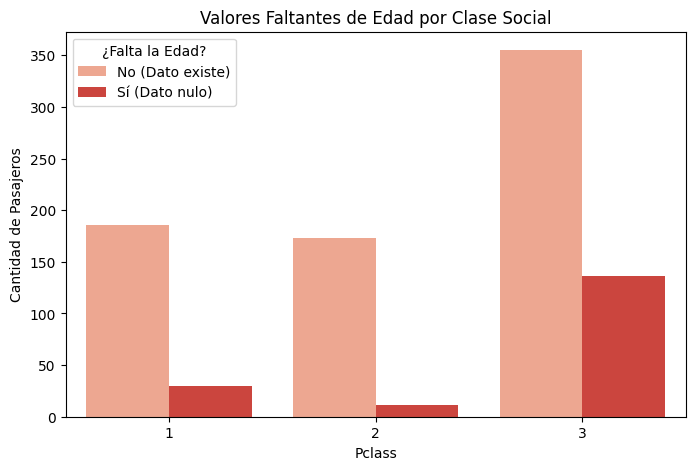

In [199]:
titanic['Edad_Faltante'] = titanic['Age'].isnull()

plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Edad_Faltante', data=titanic, palette='Reds')
plt.title('Valores Faltantes de Edad por Clase Social')
plt.legend(title='¿Falta la Edad?', labels=['No (Dato existe)', 'Sí (Dato nulo)'])
plt.ylabel('Cantidad de Pasajeros')
plt.show()



*  ¿Qué variables tienen valores faltantes? *Las variables de Edad y Cabina son las que presentan mayor cantidad de valores nulos, mientras que Embarked presenta unos pocos (solo 2)*

*   ¿Los valores faltantes son aleatorios o siguen un patrón? (ej: ¿la edad faltante está relacionada con la clase del pasajero?) *Podemos observar en la gráfica que la cantidad de datos de edad que faltan incrementa respecto a la clase social que pertenece. *

*  ¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta. *En el dato de Embarked, rellenaría los datos con el que más se repite, debido al poco peso que representa en las estadísticas (al ser una cantidad mínima). Por otra parte el caso de las cabinas, no recomiendo eliminar ni llenar estos datos con algún otro valor, debido al gran peso que representa en nuestro dataframe; lo que propongo es crear una nueva columna para poder asignar el valor si se tiene o no el valor de cabina. De esta forma se puden realizar más análisis sin tener que eliminar gran cantidad de datos. En el caso de las edades, considero que llenar los datos nulos con la mediana dependiendo de la clase social es una propuesta óptima para poder realizar análsis sin alterar la naturaleza de los datos originales.*




## Parte 4: Pregunta Original

### ¿El alto riesgo de morir de las familias numerosas fue culpa de su tamaño (logística) o fue simplemente porque las familias grandes solían ser pobres (Clase 3)?

La idea es primero analizar la cantidad de miembros que debe tener una familia para poder incrementar las posibilidades de sobrevivir considerando la información presentada en el dataset.

Se relaciona la variable SibSp, Parch y Survived.

Después, se debe de averiguar si el tamaño de la familia es determinante para definir su futuro, o si también depende de la clase social a la que pertenecían.Si los ricos con familias grandes sobrevivieron, entonces el problema era el dinero. Si los ricos con familias grandes también murieron, entonces el problema era el tamaño del grupo (logística).

```
# Esto tiene formato de código
```



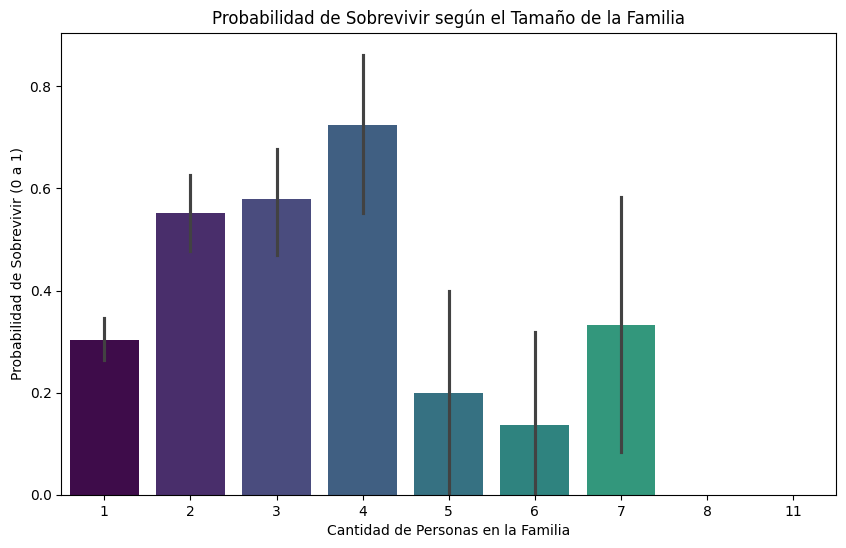

In [200]:
# Crear columna del tamaño de familia considerando herman@s, espos@s, padres e hij@s.
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

plt.figure(figsize=(10, 6))

# Usar barplot para calcular el promedio de supervivencia
sns.barplot(x='FamilySize', y='Survived', data=titanic, hue='FamilySize', palette='viridis', legend=False)


plt.title('Probabilidad de Sobrevivir según el Tamaño de la Familia')
plt.xlabel('Cantidad de Personas en la Familia')
plt.ylabel('Probabilidad de Sobrevivir (0 a 1)')
plt.show()

De la gráfica de barras, podemos observar que el tamaño de familia óptimo para incrementar la propabilidad de sobrevivir es de 4 personas. De igual forma, podemos ver que al tener una familia numerosa (>8) era definitivo el no sobrevivir.

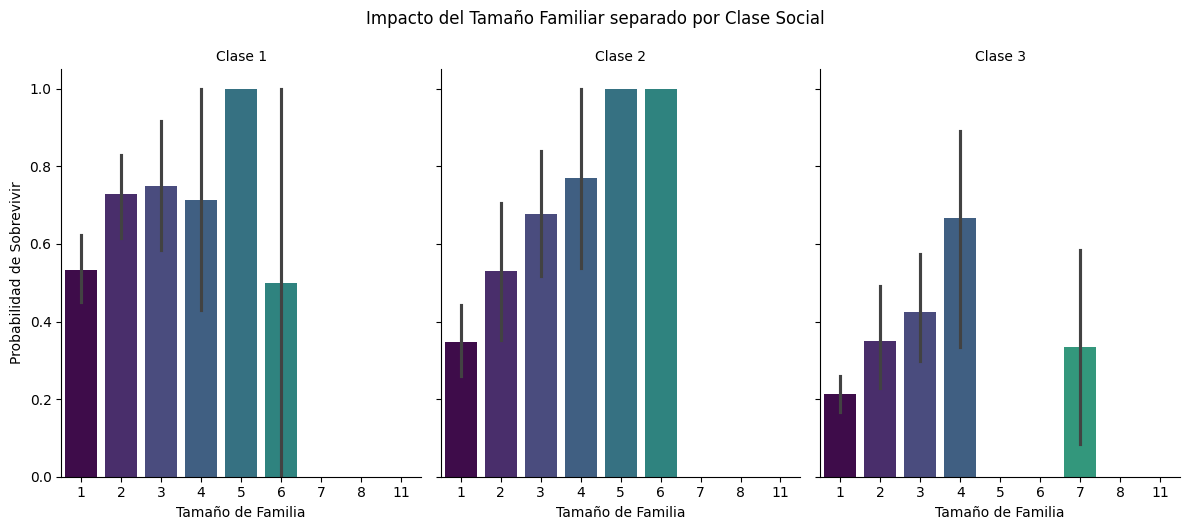

In [201]:
g = sns.catplot(x='FamilySize', y='Survived', col='Pclass',
                data=titanic, kind='bar', height=5, aspect=0.8, palette='viridis', hue='FamilySize', legend=False)

# Ajustes visuales
g.set_axis_labels("Tamaño de Familia", "Probabilidad de Sobrevivir")
g.set_titles("Clase {col_name}") # Pone título a cada panel
g.fig.suptitle('Impacto del Tamaño Familiar separado por Clase Social', y=1.05)

plt.show()

En la clase 3, podemos obsevar que tener una familia de más de 5 personas representa menor probabilidad de sobrevivir. En los casos de familias entre 1 y 4 personas, existía una probabilidad de sobrevivir, con un valor máximo de aproximadamente 0.6.

Por otra parte, en los casos de la clase 1, las probabilidades son mayores en una familia de 1 a 4 personas. Además que en el caso de tener 5 o más en tu familia no representaba una menor probabilidad, incluso representa una mayor probabilidad de sobrevivir.

Con base a las gráficas, podemos observar que la clase social es uno de los criterios más fuertes que se tomaron al definir a los sobrevivientes. Con esto, podemos encontrar la opción más óptima para poder tener mayor posibilidad de sobrevivir al accidente, considerando varios factores.

## Reflexión final
Durante el análisis exploratorio, considero que lo más tardado es poder comprender lo que me están describiendo los datos. Al no estar familiarizado con los nombres que se les asignó a las variables, investigar y contextualizarme es uno de los pasos más detonantes para poder realizar este análisis.

Durante la actividad, tuve la oportunidad de ir desenvolviendo preguntas pertinentes e interesantes sobre la situación del titanic. Por esto, considero que comprendí la importancia de realizar el proceso en un orden establecido, ya que con esto las ideas e hipótesis van fluyendo en orden, y con esto se genera una estructura más entendible; implicando un mejor análisis.